<a href="https://colab.research.google.com/github/rayaschein/rayadata110/blob/main/box_office_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url = "https://www.boxofficemojo.com/weekend/chart/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Use the correct class or id for the table
table = soup.find('table', {'class': 'mojo-body-table'})

data = []

if table:
    rows = table.find_all('tr')[1:]  # Assuming the first row is the header

    for row in rows:
        cells = row.find_all('td')
        if len(cells) >= 9:  # Ensure there are enough cells
            entry = {
                'rank': cells[0].text.strip(),
                'release': cells[1].text.strip(),
                'Title': cells[2].text.strip(),
                'lw': cells[3].text.strip(),
                'percentage': cells[4].text.strip(),
                'change': cells[5].text.strip(),
                'average': cells[6].text.strip(),
                'gross': cells[7].text.strip(),
                'Total Gross': cells[8].text.strip(),
                 'distributor': cells[9].text.strip() if len(cells) > 9 else ''
            }
            data.append(entry)

    if data:
        csv_file = "box_office_data.csv"
        with open(csv_file, mode='w', newline='', encoding='utf-8') as file:
            writer = csv.DictWriter(file, fieldnames=data[0].keys())
            writer.writeheader()
            for item in data:
                writer.writerow(item)
        print(f"Data saved to {csv_file}")
    else:
        print("No data extracted from the table.")
else:
    print("Table not found in the page.")


Data saved to box_office_data.csv


<Axes: xlabel='Title'>

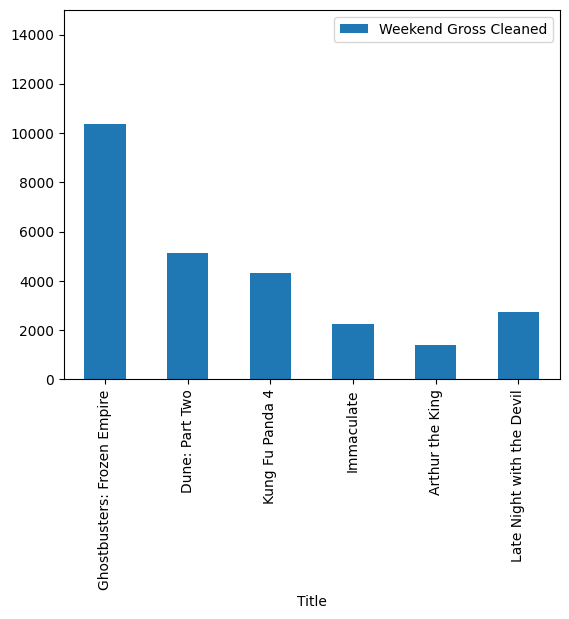

In [55]:
df=pd.read_csv('/content/box_office_data.csv')
data=df.head(6).copy()
# This line is correct as per your DataFrame structure
data['Total Gross Cleaned'] = data['Total Gross'].str.replace('[\$,]', '',regex=True).astype(float)
data['Weekend Gross Cleaned'] = data['gross'].str.replace('[\$,]', '',regex=True).astype(float)
data.plot.bar(x='Title',y='Weekend Gross Cleaned',ylim=(0,15000))
# this code has trouble showing all of the data, instead you could use a log graph

<Axes: xlabel='Title'>

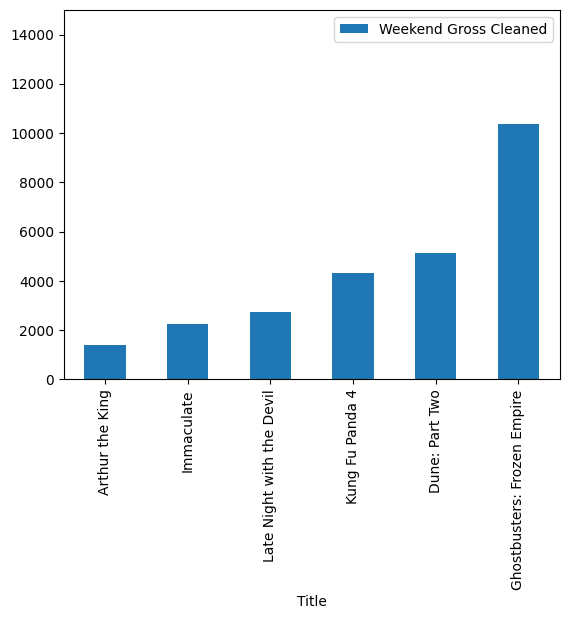

In [58]:
sorted_data = data.sort_values(by='Weekend Gross Cleaned', ascending=True)
sorted_data.plot.bar(x='Title',y='Weekend Gross Cleaned',ylim=(0,15000))


<Axes: xlabel='Title'>

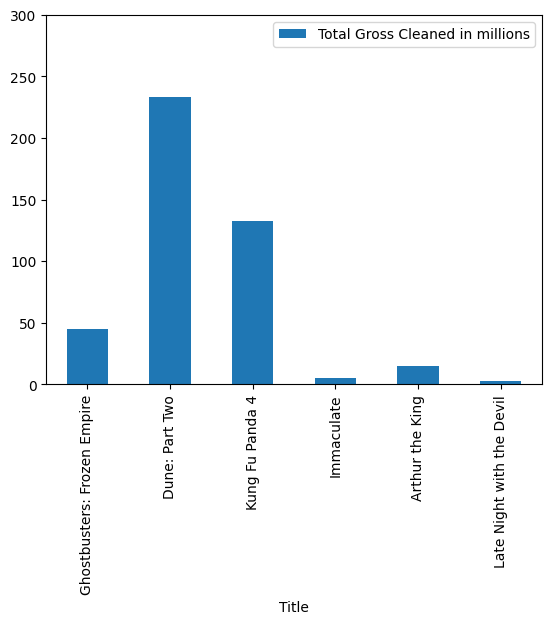

In [68]:
df=pd.read_csv('/content/box_office_data.csv')
data=df.head(6).copy()
# This line is correct as per your DataFrame structure
data['Total Gross Cleaned'] = data['Total Gross'].str.replace('[\$,]', '',regex=True).astype(float)
data['Total Gross Cleaned in millions']=round(data['Total Gross Cleaned']/1000000)
data.plot.bar(x='Title',y='Total Gross Cleaned in millions',ylim=(0,300))

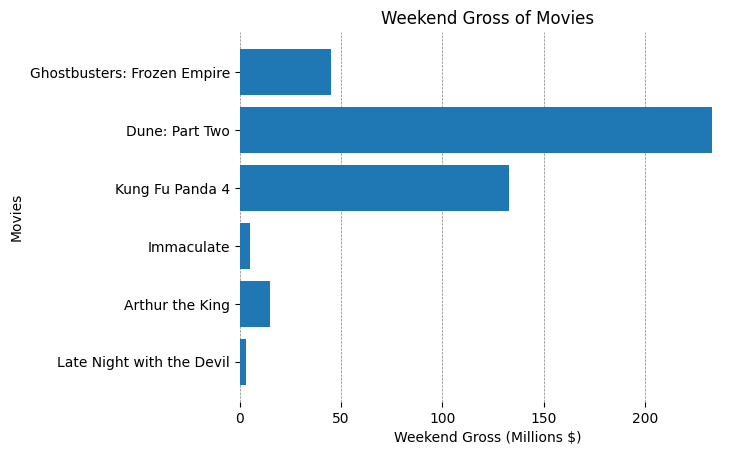

In [72]:
import matplotlib.pyplot as plt

# Assuming df['Title'] and df['Weekend Gross'] are already defined and prepared
plt.barh(data['Title'], data['Total Gross Cleaned in millions'])

# Inverting y-axis to have the highest value on top
plt.gca().invert_yaxis()

# Adding grid lines along the x-axis
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5)

# Force gridlines to be drawn behind bars
ax = plt.gca()  # Get the current axes
ax.set_axisbelow(True)  # Ensure gridlines are below other elements

# Remove all borders except the grid
ax.spines['top'].set_visible(False)    # Remove the top spine
ax.spines['right'].set_visible(False)  # Remove the right spine
ax.spines['left'].set_visible(False)   # Remove the left spine
ax.spines['bottom'].set_visible(False) # Optionally, remove the bottom spine if no x-axis is needed

# Adding a title and labels to the axes
plt.title('Weekend Gross of Movies')
plt.xlabel('Weekend Gross (Millions $)')
plt.ylabel('Movies')

plt.show()